In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/heavymetalSummer_Winter.csv")
df

,SamplingPoint,CdW,CdS,CrW,CrS,NiW,NiS,CuW,CuS,ZnW,ZnS,MnW,MnS,HgW,HgS,AsW,AsS,PbW,PbS
0,Gabtoli Dhalwes,0.007,0.003,0.049,0.044,0.102,0.107,0.388,0.458,0.286,0.187,1.084,0.995,0.014,0.009,0.191,0.109,0.376,0.188
1,Gabtoli Turag,0.008,0.007,0.089,0.083,0.128,0.495,0.965,0.932,0.623,0.659,1.198,1.178,0.036,0.027,0.156,0.102,0.395,0.452
2,Shah Cement,0.015,0.018,0.095,0.082,0.207,0.149,1.420,1.597,0.669,0.573,1.178,1.073,0.081,0.108,0.095,0.063,0.441,0.337
3,Hazaribag,2.210,2.100,1.423,1.139,1.252,0.065,0.926,0.988,0.612,0.602,3.791,3.450,0.124,0.176,0.102,0.098,1.388,1.836
4,Rayerbazar,0.003,0.005,0.025,0.029,0.058,0.089,0.198,0.114,0.307,0.309,1.100,1.002,0.002,0.093,0.079,0.057,0.316,0.119
5,Kholamora,0.005,0.007,0.031,0.045,0.062,0.216,0.850,1.976,0.598,0.759,0.998,0.872,0.009,0.017,0.061,0.075,0.294,0.178
6,Zinzira,0.092,0.106,0.296,0.198,0.721,1.023,1.832,1.851,0.753,0.755,3.262,3.107,0.092,0.089,0.098,0.112,0.567,1.457
7,Sadarghat Terminal,0.165,0.193,1.102,1.133,0.356,0.451,0.652,0.633,0.335,0.442,2.979,2.456,0.137,0.255,0.107,0.161,1.979,2.144
8,Postogola Bri,0.082,0.069,0.511,0.370,0.256,0.385,0.095,0.115,0.173,0.292,1.245,1.114,0.107,0.198,0.062,0.059,0.953,1.075


In [4]:
param_adult= {
    "IR" : 2.5,
    "EF": 365,
    "ED": 70,
    "BW": 70,
    "AT": 365 * 70,
    "SA": 18000,
    "ET": 0.58,
    "CF": 10**-3,
    'Kp': {
        "Mn": 0.001,
        "Cr": 0.002,
        "Ni": 0.0002,
        "Cu": 0.001,
        "Zn": 0.0006,
        "As": 0.001,
        "Cd": 0.001,
        "Hg": 0.001,
        "Pb": 0.0001
    },
    'RfDing': {
        "Mn": 0.024,
        "Cr": 0.003,
        "Ni": 0.025,
        "Cu": 0.04,
        "Zn": 0.3,
        "As": 0.0003,
        "Cd": 0.0005,
        "Hg": 0.00016,
        "Pb": 0.0035
    },
    "RfDderm": {
        "Mn": 0.00096,
        "Cr": 0.0195,
        "Ni": 0.0054,
        "Cu": 0.04,
        "Zn": 0.06,
        "As": 0.0003,
        "Cd": 0.000025,
        "Hg": 0.00016,
        "Pb": 0.042
        
    },
    "CSFing": {
        "Cd": 0.38,
        "Cr": 0.5,
        "As": 1.5,
        "Pb": 0.0085,
        "Ni": 1.7
    },
    "CSFderm": {
        "Cd": 0.38,
        "Cr": 0.5,
        "As": 1.5,
        "Pb": 0.0085,
        "Ni": 1.7
    }
    

}

param_child= {
    "IR" : 0.64,
    "EF": 365,
    "ED": 6,
    "BW": 25,
    "AT": 365 * 6,
    "SA": 6600,
    "ET": 1,
    "CF": 10**-3,
    'Kp': {
        "Mn": 0.001,
        "Cr": 0.002,
        "Ni": 0.0002,
        "Cu": 0.001,
        "Zn": 0.0006,
        "As": 0.001,
        "Cd": 0.001,
        "Hg": 0.001,
        "Pb": 0.0001
    },
    'RfDing': {
        "Mn": 0.024,
        "Cr": 0.003,
        "Ni": 0.025,
        "Cu": 0.04,
        "Zn": 0.3,
        "As": 0.0003,
        "Cd": 0.0005,
        "Hg": 0.00016,
        "Pb": 0.0035
    },
    "RfDderm": {
        "Mn": 0.00096,
        "Cr": 0.0195,
        "Ni": 0.0054,
        "Cu": 0.04,
        "Zn": 0.06,
        "As": 0.0003,
        "Cd": 0.000025,
        "Hg": 0.00016,
        "Pb": 0.042
    },
    "CSFing": {
        "Cd": 0.38,
        "Cr": 0.5,
        "As": 1.5,
        "Pb": 0.0085,
        "Ni": 1.7
    },
    "CSFderm": {
        "Cd": 0.38,
        "Cr": 0.5,
        "As": 1.5,
        "Pb": 0.0085,
        "Ni": 1.7
    }
    

}

In [13]:
df

,SamplingPoint,CdW,CdS,CrW,CrS,NiW,NiS,CuW,CuS,ZnW,ZnS,MnW,MnS,HgW,HgS,AsW,AsS,PbW,PbS
0,Gabtoli Dhalwes,0.007,0.003,0.049,0.044,0.102,0.107,0.388,0.458,0.286,0.187,1.084,0.995,0.014,0.009,0.191,0.109,0.376,0.188
1,Gabtoli Turag,0.008,0.007,0.089,0.083,0.128,0.495,0.965,0.932,0.623,0.659,1.198,1.178,0.036,0.027,0.156,0.102,0.395,0.452
2,Shah Cement,0.015,0.018,0.095,0.082,0.207,0.149,1.420,1.597,0.669,0.573,1.178,1.073,0.081,0.108,0.095,0.063,0.441,0.337
3,Hazaribag,2.210,2.100,1.423,1.139,1.252,0.065,0.926,0.988,0.612,0.602,3.791,3.450,0.124,0.176,0.102,0.098,1.388,1.836
4,Rayerbazar,0.003,0.005,0.025,0.029,0.058,0.089,0.198,0.114,0.307,0.309,1.100,1.002,0.002,0.093,0.079,0.057,0.316,0.119
5,Kholamora,0.005,0.007,0.031,0.045,0.062,0.216,0.850,1.976,0.598,0.759,0.998,0.872,0.009,0.017,0.061,0.075,0.294,0.178
6,Zinzira,0.092,0.106,0.296,0.198,0.721,1.023,1.832,1.851,0.753,0.755,3.262,3.107,0.092,0.089,0.098,0.112,0.567,1.457
7,Sadarghat Terminal,0.165,0.193,1.102,1.133,0.356,0.451,0.652,0.633,0.335,0.442,2.979,2.456,0.137,0.255,0.107,0.161,1.979,2.144
8,Postogola Bri,0.082,0.069,0.511,0.370,0.256,0.385,0.095,0.115,0.173,0.292,1.245,1.114,0.107,0.198,0.062,0.059,0.953,1.075


In [5]:
df.describe()

,CdW,CdS,CrW,CrS,NiW,NiS,CuW,CuS,ZnW,ZnS,MnW,MnS,HgW,HgS,AsW,AsS,PbW,PbS
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.287444,0.278667,0.402333,0.347000,0.349111,0.331111,0.814000,0.962667,0.484000,0.508667,1.870556,1.694111,0.066889,0.108000,0.105667,0.092889,0.745444,0.865111
std,0.723124,0.686003,0.518671,0.459871,0.396793,0.305966,0.563952,0.709056,0.207588,0.210215,1.126384,1.018098,0.052356,0.086286,0.042743,0.033584,0.586267,0.783375
min,0.003000,0.003000,0.025000,0.029000,0.058000,0.065000,0.095000,0.114000,0.173000,0.187000,0.998000,0.872000,0.002000,0.009000,0.061000,0.057000,0.294000,0.119000
25%,0.007000,0.007000,0.049000,0.045000,0.102000,0.107000,0.388000,0.458000,0.307000,0.309000,1.100000,1.002000,0.014000,0.027000,0.079000,0.063000,0.376000,0.188000
50%,0.015000,0.018000,0.095000,0.083000,0.207000,0.216000,0.850000,0.932000,0.598000,0.573000,1.198000,1.114000,0.081000,0.093000,0.098000,0.098000,0.441000,0.452000
75%,0.092000,0.106000,0.511000,0.370000,0.356000,0.451000,0.965000,1.597000,0.623000,0.659000,2.979000,2.456000,0.107000,0.176000,0.107000,0.109000,0.953000,1.457000
max,2.210000,2.100000,1.423000,1.139000,1.252000,1.023000,1.832000,1.976000,0.753000,0.759000,3.791000,3.450000,0.137000,0.255000,0.191000,0.161000,1.979000,2.144000


In [29]:
CdWnorm = np.random.normal(df.CdW.mean(), df.CdW.std(), size = 10000)
CdWlog = np.random.lognormal(df.CdW.mean(), df.CdW.std(), size = 10000)

CrWnorm = np.random.normal(df.CrW.mean(), df.CrW.std(), size = 10000)
CrWlog = np.random.lognormal(df.CrW.mean(), df.CrW.std(), size = 10000)

NiWnorm = np.random.normal(df.NiW.mean(), df.NiW.std(), size = 10000)
NiWlog = np.random.lognormal(df.NiW.mean(), df.NiW.std(), size = 10000)

CuWnorm = np.random.normal(df.CuW.mean(), df.CuW.std(), size = 10000)
CuWlog = np.random.lognormal(df.CuW.mean(), df.CuW.std(), size = 10000)

ZnWnorm = np.random.normal(df.ZnW.mean(), df.ZnW.std(), size = 10000)
ZnWlog = np.random.lognormal(df.ZnW.mean(), df.ZnW.std(), size = 10000)

MnWnorm = np.random.normal(df.MnW.mean(), df.MnW.std(), size = 10000)
MnWlog = np.random.lognormal(df.MnW.mean(), df.MnW.std(), size = 10000)

AsWnorm = np.random.normal(df.AsW.mean(), df.AsW.std(), size = 10000)
AsWlog = np.random.lognormal(df.AsW.mean(), df.AsW.std(), size = 10000)

HgWnorm = np.random.normal(df.HgW.mean(), df.HgW.std(), size = 10000)
HgWlog = np.random.lognormal(df.HgW.mean(), df.HgW.std(), size = 10000)

PbWnorm = np.random.normal(df.PbW.mean(), df.PbW.std(), size = 10000)
PbWlog = np.random.lognormal(df.PbW.mean(), df.PbW.std(), size = 10000)


CdSnorm = np.random.normal(df.CdS.mean(), df.CdS.std(), size = 10000)
CdSlog = np.random.lognormal(df.CdS.mean(), df.CdS.std(), size = 10000)

CrSnorm = np.random.normal(df.CrS.mean(), df.CrS.std(), size = 10000)
CrSlog = np.random.lognormal(df.CrS.mean(), df.CrS.std(), size = 10000)

NiSnorm = np.random.normal(df.NiS.mean(), df.NiS.std(), size = 10000)
NiSlog = np.random.lognormal(df.NiS.mean(), df.NiS.std(), size = 10000)

CuSnorm = np.random.normal(df.CuS.mean(), df.CuS.std(), size = 10000)
CuSlog = np.random.lognormal(df.CuS.mean(), df.CuS.std(), size = 10000)

ZnSnorm = np.random.normal(df.ZnS.mean(), df.ZnS.std(), size = 10000)
ZnSlog = np.random.lognormal(df.ZnS.mean(), df.ZnS.std(), size = 10000)

MnSnorm = np.random.normal(df.MnS.mean(), df.MnS.std(), size = 10000)
MnSlog = np.random.lognormal(df.MnS.mean(), df.MnS.std(), size = 10000)

AsSnorm = np.random.normal(df.AsS.mean(), df.AsS.std(), size = 10000)
AsSlog = np.random.lognormal(df.AsS.mean(), df.AsS.std(), size = 10000)

HgSnorm = np.random.normal(df.HgS.mean(), df.HgS.std(), size = 10000)
HgSlog = np.random.lognormal(df.HgS.mean(), df.HgS.std(), size = 10000)

PbSnorm = np.random.normal(df.PbS.mean(), df.PbS.std(), size = 10000)
PbSlog = np.random.lognormal(df.PbS.mean(), df.PbS.std(), size = 10000)

In [30]:
norm_dataW = pd.DataFrame(data={
    "CdW": CdWnorm,
    "CrW": CrWnorm,
    "NiW": NiWnorm,
    "CuW": CuWnorm,
    "ZnW": ZnWnorm,
    "MnW": MnWnorm,
    "HgW": HgWnorm,
    "AsW": AsWnorm,
    "PbW": PbWnorm,
    
})

norm_dataS = pd.DataFrame(data={
    "CdS": CdSnorm,
    "CrS": CrSnorm,
    "NiS": NiSnorm,
    "CuS": CuSnorm,
    "ZnS": ZnSnorm,
    "MnS": MnSnorm,
    "HgS": HgSnorm,
    "AsS": AsSnorm,
    "PbS": PbSnorm,
    
})


log_dataW = pd.DataFrame(data={
    "CdW": CdWlog,
    "CrW": CrWlog,
    "NiW": NiWlog,
    "CuW": CuWlog,
    "ZnW": ZnWlog,
    "MnW": MnWlog,
    "HgW": HgWlog,
    "AsW": AsWlog,
    "PbW": PbWlog,
    
})

log_dataS = pd.DataFrame(data={
    "CdS": CdSlog,
    "CrS": CrSlog,
    "NiS": NiSlog,
    "CuS": CuSlog,
    "ZnS": ZnSlog,
    "MnS": MnSlog,
    "HgS": HgSlog,
    "AsS": AsSlog,
    "PbS": PbSlog,
    
})

In [31]:
norm_dataW

,CdW,CrW,NiW,CuW,ZnW,MnW,HgW,AsW,PbW
0,0.453076,0.378335,0.187063,1.688546,0.561055,2.210904,0.105358,0.130458,0.311020
1,0.940390,1.626018,0.987323,0.537292,0.287513,2.514580,0.145255,0.120557,0.445222
2,1.040896,0.429886,0.549208,0.836685,0.362209,0.876234,0.095933,0.106851,0.983606
3,-0.828049,0.518616,0.338466,1.480740,0.406548,2.023322,0.047289,0.096473,2.329211
4,0.343846,0.589830,-0.105996,0.989405,0.902580,0.993651,0.101329,0.066271,0.930713
...,...,...,...,...,...,...,...,...,...
9995,0.896245,0.440972,0.603980,0.852406,0.667296,1.752162,0.138329,0.086527,0.675265
9996,-0.629190,1.326445,0.380736,1.052135,0.474664,1.621961,0.024595,0.093313,0.197507
9997,-0.794947,-0.338834,0.232738,0.224398,0.497084,2.421566,0.037394,0.028890,-0.178771
9998,0.272677,0.951550,0.437923,1.200145,0.602393,0.134863,0.073742,0.127508,0.300603


In [34]:
norm_dataW.describe()

,CdW,CrW,NiW,CuW,ZnW,MnW,HgW,AsW,PbW
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.294432,0.402955,0.345564,0.822693,0.483455,1.861655,0.066819,0.104809,0.742779
std,0.720205,0.514618,0.397200,0.565437,0.208928,1.128093,0.052564,0.042790,0.582069
min,-2.987753,-1.535098,-1.135797,-1.262162,-0.326384,-2.603001,-0.132108,-0.053766,-1.464847
25%,-0.189389,0.051633,0.081366,0.442806,0.340260,1.107056,0.031451,0.075575,0.357581
50%,0.288778,0.399949,0.348912,0.824331,0.482600,1.846143,0.066935,0.105275,0.749836
75%,0.781266,0.752680,0.617613,1.200127,0.623262,2.616964,0.103097,0.134014,1.133872
max,2.966500,2.370837,1.811093,2.920627,1.442180,5.991909,0.276621,0.247779,2.676517


In [35]:
log_dataW.describe()

,CdW,CrW,NiW,CuW,ZnW,MnW,HgW,AsW,PbW
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.730341,1.712601,1.519928,2.655290,1.660928,12.417793,1.070686,1.112690,2.492272
std,1.401682,0.949587,0.628360,1.610134,0.346730,19.111178,0.055628,0.047906,1.600158
min,0.098017,0.176738,0.356508,0.321714,0.670739,0.095962,0.881691,0.933180,0.267971
25%,0.820722,1.053090,1.068498,1.552462,1.415983,3.041740,1.032109,1.079941,1.410708
50%,1.341357,1.490844,1.401145,2.257509,1.625509,6.486909,1.069412,1.112044,2.100920
75%,2.193699,2.121159,1.849308,3.311939,1.867307,14.102365,1.107637,1.144022,3.122708
max,17.411189,8.761314,7.159754,18.869734,3.604799,431.291467,1.294816,1.330012,20.534821


In [ ]:
norm_dataW.to_csv("monteData/

In [16]:
CdWnorm[1:10]

array([-0.67173799, -0.22418363, -0.49994235, -1.02000355,  0.85600336,
        0.39541269, -0.03352289, -0.39184334,  1.83932838])

(array([7.004e+03, 2.297e+03, 4.960e+02, 1.320e+02, 4.300e+01, 1.400e+01,
        9.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.081688  ,  1.94619001,  3.81069201,  5.67519402,  7.53969603,
         9.40419804, 11.26870004, 13.13320205, 14.99770406, 16.86220607,
        18.72670808]),
 <BarContainer object of 10 artists>)

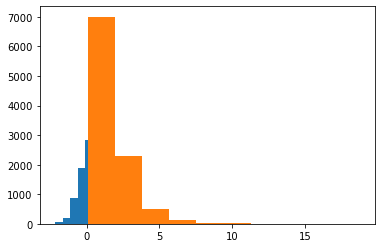

In [21]:
plt.hist(CdWnorm)
plt.hist(CdWlog)


In [ ]:
# ====================== Winter Adult ===========================

# ------------------------- HI-----------------------------------

shil = pd.DataFrame(data={
    "Cd": df.CdW,
    "Cr": df.CrW,
    "Ni": df.NiW,
    "Cu": df.CuW,
    "Zn": df.ZnW,
    "Mn": df.MnW,
    "Hg": df.HgW,
    "As": df.AsW,
    "Pb": df.PbW,
})

Mn = (shil["Mn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])

cdi_ing = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

hqMn = cdi_ing["Mn"] / param_adult["RfDing"]["Mn"]
hqCr = cdi_ing["Cr"] / param_adult["RfDing"]["Cr"]
hqCu = cdi_ing["Cu"] / param_adult["RfDing"]["Cu"]
hqZn = cdi_ing["Zn"] / param_adult["RfDing"]["Zn"]
hqAs = cdi_ing["As"] / param_adult["RfDing"]["As"]
hqCd = cdi_ing["Cd"] / param_adult["RfDing"]["Cd"]
hqHg = cdi_ing["Hg"] / param_adult["RfDing"]["Hg"]
hqPb = cdi_ing["Pb"] / param_adult["RfDing"]["Pb"]
hqNi = cdi_ing["Ni"] / param_adult["RfDing"]["Ni"]

hq_ingwa = pd.DataFrame(data = {
    "Mn": hqMn,
    "Cr": hqCr,
    "Ni": hqNi,
    "Cu": hqCu,
    "Zn": hqZn,
    "As": hqAs,
    "Cd": hqCd,
    "Hg": hqHg,
    "Pb": hqPb
}
)

Mn = (shil["Mn"] * param_adult["SA"] * param_adult["Kp"]["Mn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["SA"] * param_adult["Kp"]["Cr"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["SA"] * param_adult["Kp"]["Ni"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["SA"] * param_adult["Kp"]["Cu"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["SA"] * param_adult["Kp"]["Zn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["SA"] * param_adult["Kp"]["As"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["SA"] * param_adult["Kp"]["Cd"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["SA"] * param_adult["Kp"]["Hg"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["SA"] * param_adult["Kp"]["Pb"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])

cdi_derm = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

hqMn = cdi_derm["Mn"] / param_adult["RfDderm"]["Mn"]
hqCr = cdi_derm["Cr"] / param_adult["RfDderm"]["Cr"]
hqCu = cdi_derm["Cu"] / param_adult["RfDderm"]["Cu"]
hqZn = cdi_derm["Zn"] / param_adult["RfDderm"]["Zn"]
hqAs = cdi_derm["As"] / param_adult["RfDderm"]["As"]
hqCd = cdi_derm["Cd"] / param_adult["RfDderm"]["Cd"]
hqHg = cdi_derm["Hg"] / param_adult["RfDderm"]["Hg"]
hqPb = cdi_derm["Pb"] / param_adult["RfDderm"]["Pb"]
hqNi = cdi_derm["Ni"] / param_adult["RfDderm"]["Ni"]

hq_dermwa = pd.DataFrame(data = {
    "Mn": hqMn,
    "Cr": hqCr,
    "Ni": hqNi,
    "Cu": hqCu,
    "Zn": hqZn,
    "As": hqAs,
    "Cd": hqCd,
    "Hg": hqHg,
    "Pb": hqPb
}
)

hi = hq_dermwa + hq_ingwa
hiwa = hi.sum(axis=1)

#--------------------------------------- CR ------------------------------


shil = pd.DataFrame(data={
    "Cd": df.CdW,
    "Cr": df.CrW,
    "Ni": df.NiW,
    "Cu": df.CuW,
    "Zn": df.ZnW,
    "Mn": df.MnW,
    "Hg": df.HgW,
    "As": df.AsW,
    "Pb": df.PbW,
})

Mn = (shil["Mn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])

cdi_ing = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

Mn = (shil["Mn"] * param_adult["SA"] * param_adult["Kp"]["Mn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["SA"] * param_adult["Kp"]["Cr"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["SA"] * param_adult["Kp"]["Ni"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["SA"] * param_adult["Kp"]["Cu"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["SA"] * param_adult["Kp"]["Zn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["SA"] * param_adult["Kp"]["As"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["SA"] * param_adult["Kp"]["Cd"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["SA"] * param_adult["Kp"]["Hg"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["SA"] * param_adult["Kp"]["Pb"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])

cdi_derm = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

Cd = cdi_ing.Cd * param_adult["CSFing"]["Cd"]
Cr = cdi_ing.Cr * param_adult["CSFing"]["Cr"]
As = cdi_ing.As * param_adult["CSFing"]["As"]
Pb = cdi_ing.Pb * param_adult["CSFing"]["Pb"]
Ni = cdi_ing.Ni * param_adult["CSFing"]["Ni"]


ilcr_ingwa = pd.DataFrame(data={
    "Cd": Cd,
    "Cr": Cr,
    "As": As,
    "Pb": Pb,
    "Ni": Ni
})

Cd = cdi_derm.Cd * param_adult["CSFderm"]["Cd"]
Cr = cdi_derm.Cr * param_adult["CSFderm"]["Cr"]
As = cdi_derm.As * param_adult["CSFderm"]["As"]
Pb = cdi_derm.Pb * param_adult["CSFderm"]["Pb"]
Ni = cdi_derm.Ni * param_adult["CSFderm"]["Ni"]

ilcr_dermwa = pd.DataFrame(data={
    "Cd": Cd,
    "Cr": Cr,
    "As": As,
    "Pb": Pb,
    "Ni": Ni
})

ilcr = ilcr_ingwa + ilcr_dermwa
ilcr_wadult = ilcr.sum(axis=1)

























# ============================ Summer Adult ==============================

#---------------------------- HI ----------------------------------------
shil = pd.DataFrame(data={
    "Cd": df.CdS,
    "Cr": df.CrS,
    "Ni": df.NiS,
    "Cu": df.CuS,
    "Zn": df.ZnS,
    "Mn": df.MnS,
    "Hg": df.HgS,
    "As": df.AsS,
    "Pb": df.PbS,
})

Mn = (shil["Mn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])

cdi_ing = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

hqMn = cdi_ing["Mn"] / param_adult["RfDing"]["Mn"]
hqCr = cdi_ing["Cr"] / param_adult["RfDing"]["Cr"]
hqCu = cdi_ing["Cu"] / param_adult["RfDing"]["Cu"]
hqZn = cdi_ing["Zn"] / param_adult["RfDing"]["Zn"]
hqAs = cdi_ing["As"] / param_adult["RfDing"]["As"]
hqCd = cdi_ing["Cd"] / param_adult["RfDing"]["Cd"]
hqHg = cdi_ing["Hg"] / param_adult["RfDing"]["Hg"]
hqPb = cdi_ing["Pb"] / param_adult["RfDing"]["Pb"]
hqNi = cdi_ing["Ni"] / param_adult["RfDing"]["Ni"]

hq_ingsa = pd.DataFrame(data = {
    "Mn": hqMn,
    "Cr": hqCr,
    "Ni": hqNi,
    "Cu": hqCu,
    "Zn": hqZn,
    "As": hqAs,
    "Cd": hqCd,
    "Hg": hqHg,
    "Pb": hqPb
}
)

Mn = (shil["Mn"] * param_adult["SA"] * param_adult["Kp"]["Mn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["SA"] * param_adult["Kp"]["Cr"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["SA"] * param_adult["Kp"]["Ni"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["SA"] * param_adult["Kp"]["Cu"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["SA"] * param_adult["Kp"]["Zn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["SA"] * param_adult["Kp"]["As"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["SA"] * param_adult["Kp"]["Cd"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["SA"] * param_adult["Kp"]["Hg"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["SA"] * param_adult["Kp"]["Pb"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])

cdi_derm = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

hqMn = cdi_derm["Mn"] / param_adult["RfDderm"]["Mn"]
hqCr = cdi_derm["Cr"] / param_adult["RfDderm"]["Cr"]
hqCu = cdi_derm["Cu"] / param_adult["RfDderm"]["Cu"]
hqZn = cdi_derm["Zn"] / param_adult["RfDderm"]["Zn"]
hqAs = cdi_derm["As"] / param_adult["RfDderm"]["As"]
hqCd = cdi_derm["Cd"] / param_adult["RfDderm"]["Cd"]
hqHg = cdi_derm["Hg"] / param_adult["RfDderm"]["Hg"]
hqPb = cdi_derm["Pb"] / param_adult["RfDderm"]["Pb"]
hqNi = cdi_derm["Ni"] / param_adult["RfDderm"]["Ni"]

hq_dermsa = pd.DataFrame(data = {
    "Mn": hqMn,
    "Cr": hqCr,
    "Ni": hqNi,
    "Cu": hqCu,
    "Zn": hqZn,
    "As": hqAs,
    "Cd": hqCd,
    "Hg": hqHg,
    "Pb": hqPb
}
)

hi = hq_dermsa + hq_ingsa
hisa = hi.sum(axis=1)

# ----------------------------------- CR ------------------------------------


shil = pd.DataFrame(data={
    "Cd": df.CdS,
    "Cr": df.CrS,
    "Ni": df.NiS,
    "Cu": df.CuS,
    "Zn": df.ZnS,
    "Mn": df.MnS,
    "Hg": df.HgS,
    "As": df.AsS,
    "Pb": df.PbS,
})

Mn = (shil["Mn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["IR"] * param_adult["EF"] * param_adult["ED"])/ (param_adult["BW"]* param_adult["AT"])

cdi_ing = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

Mn = (shil["Mn"] * param_adult["SA"] * param_adult["Kp"]["Mn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cr = (shil["Cr"] * param_adult["SA"] * param_adult["Kp"]["Cr"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Ni = (shil["Ni"] * param_adult["SA"] * param_adult["Kp"]["Ni"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cu = (shil["Cu"] * param_adult["SA"] * param_adult["Kp"]["Cu"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Zn = (shil["Zn"] * param_adult["SA"] * param_adult["Kp"]["Zn"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
As = (shil["As"] * param_adult["SA"] * param_adult["Kp"]["As"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Cd = (shil["Cd"] * param_adult["SA"] * param_adult["Kp"]["Cd"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Hg = (shil["Hg"] * param_adult["SA"] * param_adult["Kp"]["Hg"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])
Pb = (shil["Pb"] * param_adult["SA"] * param_adult["Kp"]["Pb"] * param_adult["ET"] * param_adult["EF"] * param_adult["ED"] * param_adult["CF"])/ (param_adult["BW"]* param_adult["AT"])

cdi_derm = pd.DataFrame(data = {
    "Mn": Mn,
    "Cr": Cr,
    "Ni": Ni,
    "Cu": Cu,
    "Zn": Zn,
    "As": As,
    "Cd": Cd,
    "Hg": Hg,
    "Pb": Pb
}
)

Cd = cdi_ing.Cd * param_adult["CSFing"]["Cd"]
Cr = cdi_ing.Cr * param_adult["CSFing"]["Cr"]
As = cdi_ing.As * param_adult["CSFing"]["As"]
Pb = cdi_ing.Pb * param_adult["CSFing"]["Pb"]
Ni = cdi_ing.Ni * param_adult["CSFing"]["Ni"]


ilcr_ingsa = pd.DataFrame(data={
    "Cd": Cd,
    "Cr": Cr,
    "As": As,
    "Pb": Pb,
    "Ni": Ni
})

Cd = cdi_derm.Cd * param_adult["CSFderm"]["Cd"]
Cr = cdi_derm.Cr * param_adult["CSFderm"]["Cr"]
As = cdi_derm.As * param_adult["CSFderm"]["As"]
Pb = cdi_derm.Pb * param_adult["CSFderm"]["Pb"]
Ni = cdi_derm.Pb * param_adult["CSFderm"]["Ni"]


ilcr_dermsa = pd.DataFrame(data={
    "Cd": Cd,
    "Cr": Cr,
    "As": As,
    "Pb": Pb,
    "Ni": Ni
})

ilcr = ilcr_ingsa + ilcr_dermsa
ilcr_sadult = ilcr.sum(axis=1)





